In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Mubasshira\\Downloads\\enhanced_health_insurance_claims.csv')
df.head(6)

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod
0,10944daf-f7d5-4e1d-8216-72ffa609fe41,8552381d-7960-4f64-b190-b20b8ada00a1,4a4cb19c-4863-41cf-84b0-c2b21aace988,3807.95,2024-06-07,yy006,hd662,16,M,Cardiology,Pending,90279.43,Married,Retired,Jameshaven,Routine,Paper
1,fcbebb25-fc24-4c0f-a966-749edcf83fb1,327f43ad-e3bd-4473-a9ed-46483a0a156f,422e02dd-c1fd-43dd-8af4-0c3523f997b1,9512.07,2023-05-30,tD052,mH831,27,M,Pediatrics,Approved,130448.02,Single,Student,Beltrantown,Routine,Online
2,9e9983e7-9ea7-45f5-84d8-ce49ccd8a4a1,6f3acdf7-73aa-4afa-9c2e-b25b27bdb5b0,f7733b3f-0980-47b5-a7a0-ee390869355b,7346.74,2022-09-27,zx832,dg637,40,F,Cardiology,Pending,82417.54,Divorced,Employed,West Charlesport,Emergency,Online
3,a06273ed-44bb-452b-bbad-8618de080494,5d58e183-701e-406c-a8c6-5b73cac5e912,f7a04581-de96-44ee-b773-8adac02baa59,6026.72,2023-06-25,kr421,kG326,65,M,Neurology,Pending,68516.96,Widowed,Student,West Aprilhaven,Routine,Phone
4,f702a717-254b-4cff-a0c7-8395db2f6616,8a8ebdf6-3af0-4f14-82f3-37b937c3d270,b80b9e77-97f0-47d7-b561-19f9658a7bdf,1644.58,2023-07-24,LZ261,cx805,24,M,General Practice,Pending,84122.17,Married,Student,Lake Michele,Inpatient,Phone
5,78657d24-a96e-461d-970b-d54329d9ceff,6c46c6a2-55c5-47de-a91c-62d26c145105,5c45438c-7854-448c-bd53-7f28a3321133,1644.35,2023-08-09,qM187,no581,57,M,Pediatrics,Pending,95286.87,Widowed,Student,Lake Robert,Outpatient,Paper


In [3]:
import datetime as dt
df['ClaimDate'] = pd.to_datetime(df['ClaimDate'])

df['Claimmonth'] = df['ClaimDate'].dt.month
df['Claimday'] = df['ClaimDate'].dt.day
df['Claimyear'] = df['ClaimDate'].dt.year

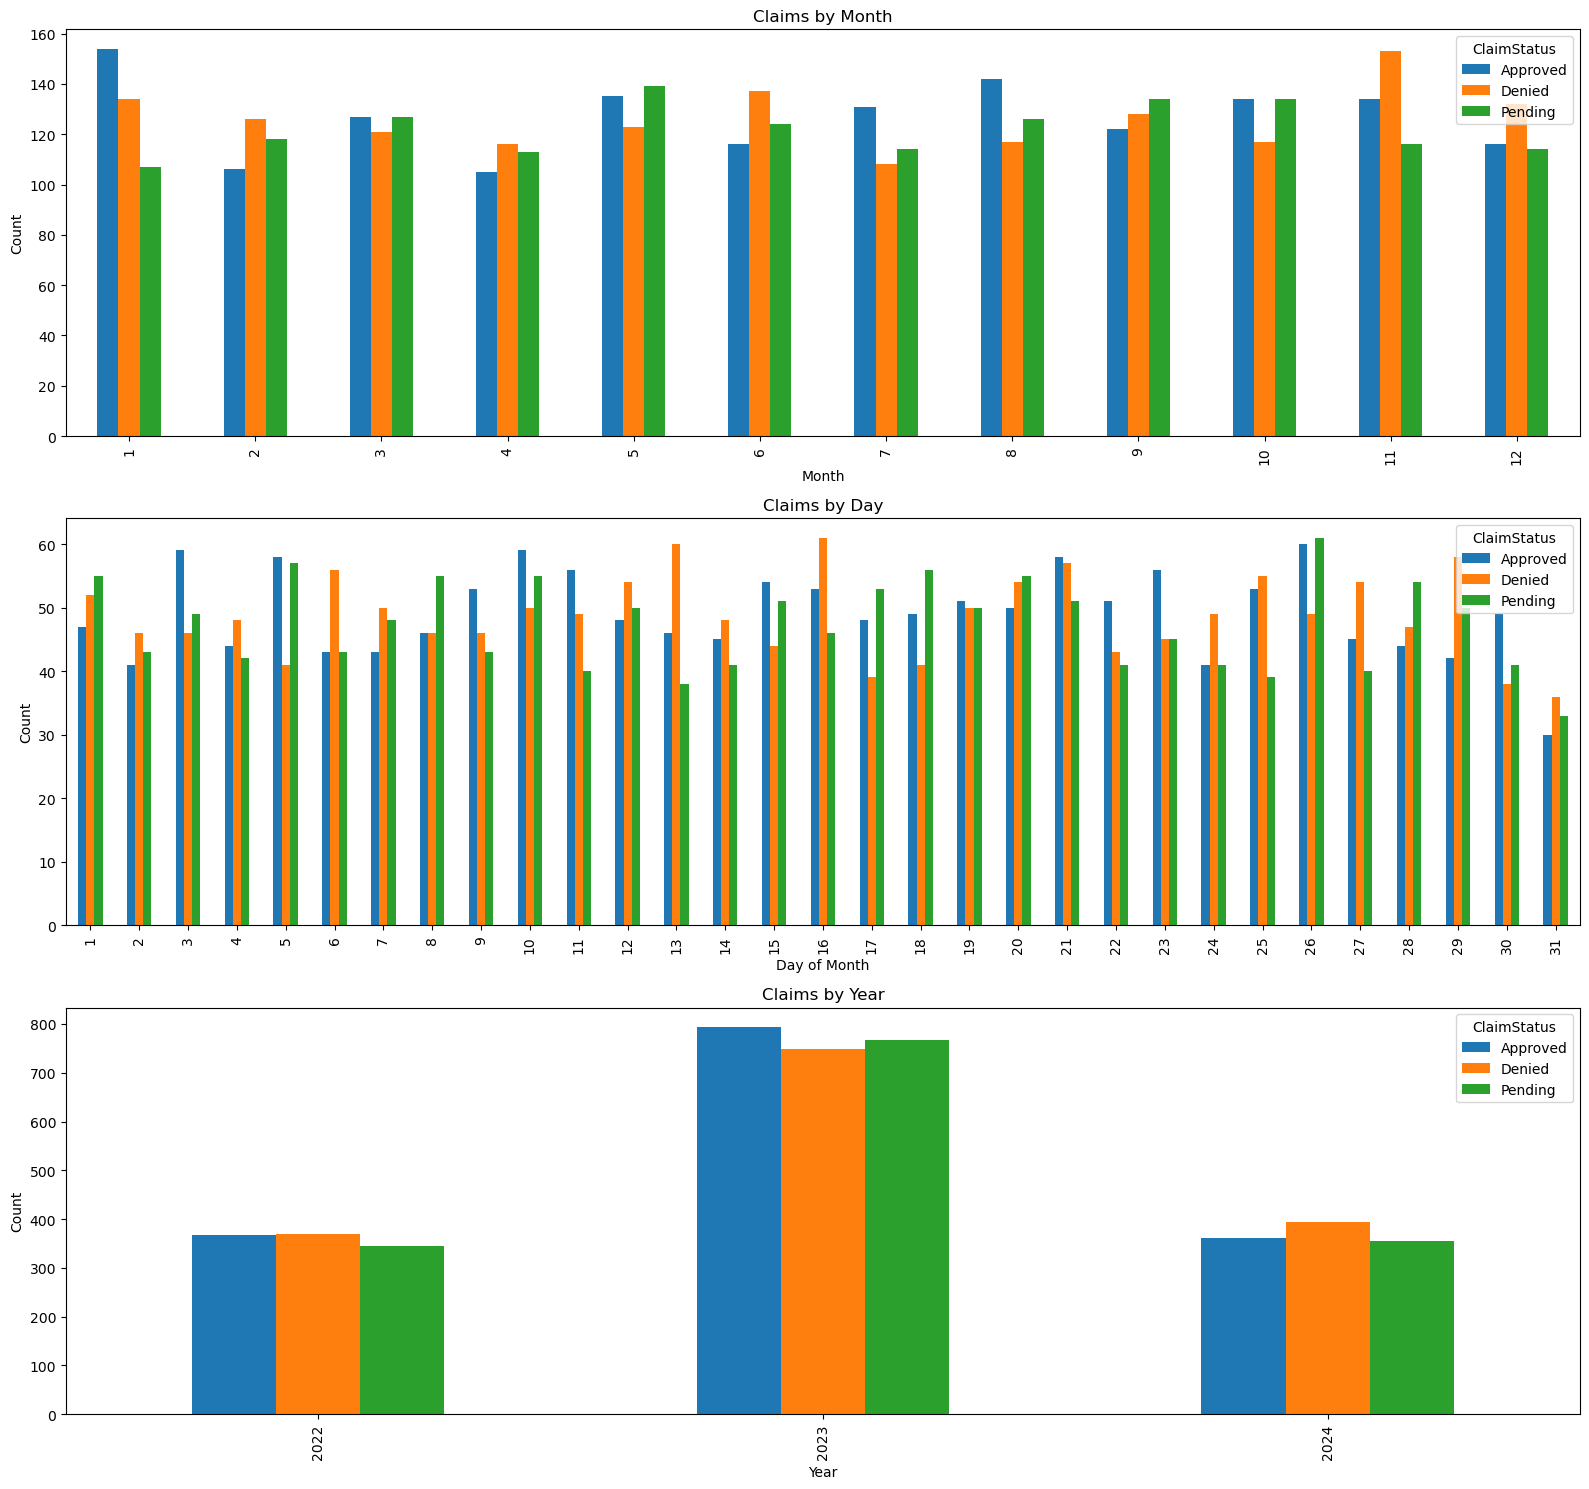

In [4]:
fig, axes = plt.subplots(3, 1, figsize=(16, 15), sharey=False)
pd.crosstab(df['Claimmonth'], df['ClaimStatus']).plot(kind='bar', ax=axes[0], title='Claims by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

# Crosstab for Day
pd.crosstab(df['Claimday'], df['ClaimStatus']).plot(kind='bar', ax=axes[1], title='Claims by Day')
axes[1].set_xlabel('Day of Month')
axes[1].set_ylabel('Count')

# Crosstab for Year
pd.crosstab(df['Claimyear'], df['ClaimStatus']).plot(kind='bar', ax=axes[2], title='Claims by Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

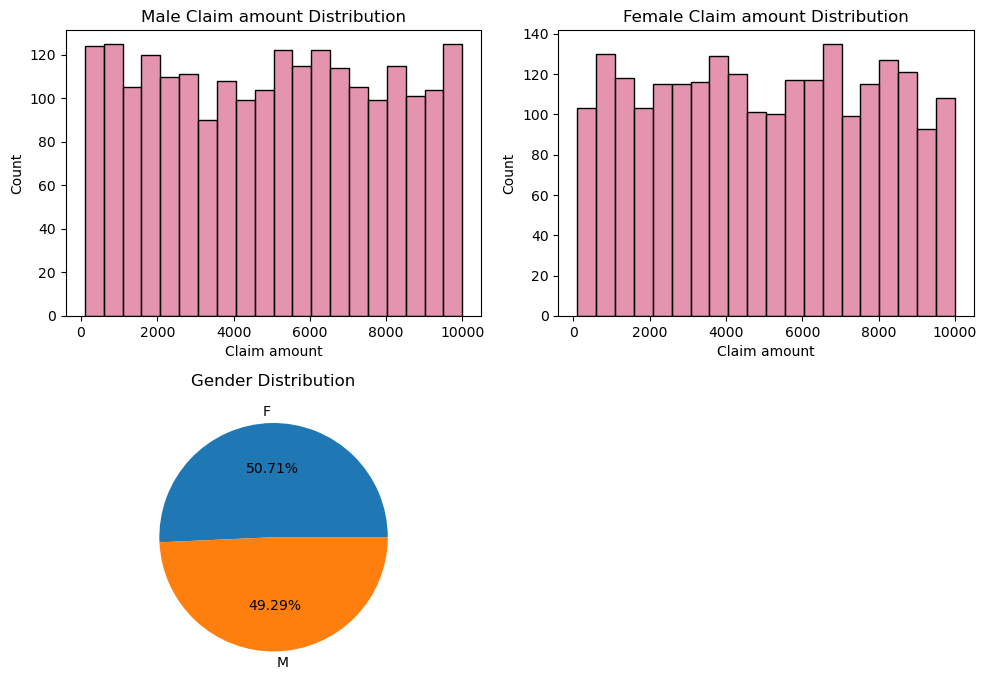

In [5]:
male_claim = df[df['PatientGender'] == 'M']['ClaimAmount']
female_claim = df[df['PatientGender'] == 'F']['ClaimAmount']
plt.figure(figsize=(10, 7))
plt.subplot(2,2,1)
sns.histplot(male_claim.values, bins = 20, palette='cubehelix', color='palevioletred')
plt.xlabel("Claim amount")
plt.ylabel("Count")
plt.title("Male Claim amount Distribution")

plt.subplot(2,2,2)
sns.histplot(female_claim.values, bins = 20, palette='cubehelix', color='palevioletred')
plt.xlabel("Claim amount")
plt.ylabel("Count")
plt.title("Female Claim amount Distribution")

gender_dist = df['PatientGender'].value_counts()
plt.subplot(2,2,3)
plt.pie(gender_dist, autopct="%.2f%%", labels=gender_dist.index)
plt.title("Gender Distribution")

plt.tight_layout()
plt.show()

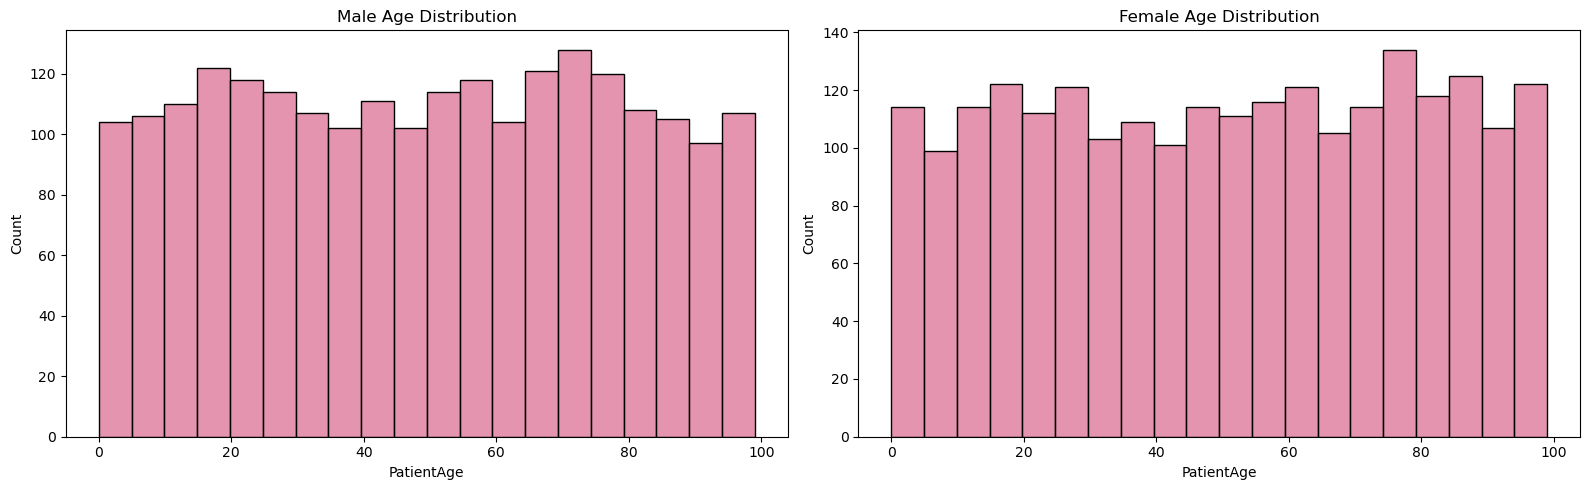

In [6]:
male_claim = df[df['PatientGender'] == 'M']['PatientAge']
female_claim = df[df['PatientGender'] == 'F']['PatientAge']
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(male_claim.values, bins = 20, palette='cubehelix', color='palevioletred')
plt.xlabel("PatientAge")
plt.ylabel("Count")
plt.title("Male Age Distribution")

plt.subplot(1,2,2)
sns.histplot(female_claim.values, bins = 20, palette='cubehelix', color='palevioletred')
plt.xlabel("PatientAge")
plt.ylabel("Count")
plt.title("Female Age Distribution")
plt.tight_layout()
plt.show()

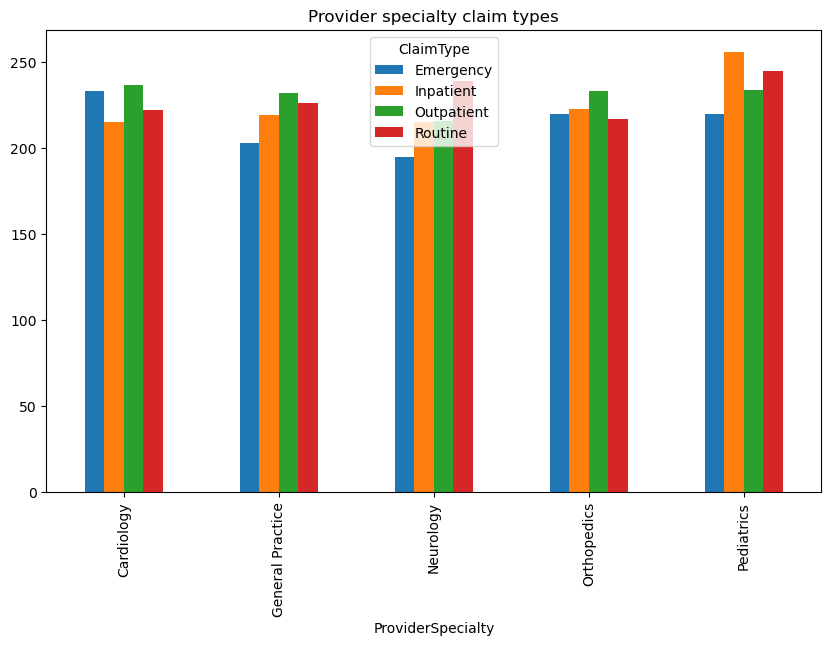

In [7]:
pd.crosstab(df['ProviderSpecialty'], df['ClaimType']).plot(kind='bar', figsize = (10,6), title='Provider specialty claim types')
plt.show()

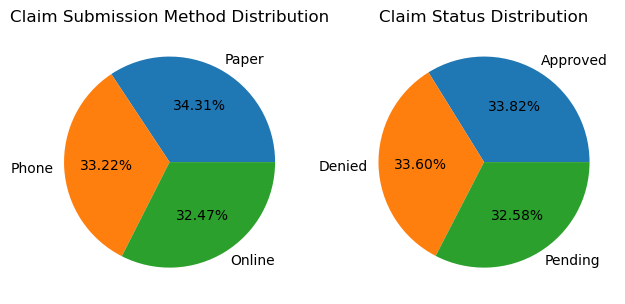

In [8]:
claimsub_dist = df['ClaimSubmissionMethod'].value_counts()
plt.subplot(1,2,1)
plt.pie(claimsub_dist, autopct="%.2f%%", labels=claimsub_dist.index)
plt.title("Claim Submission Method Distribution")

claimstatus_dist = df['ClaimStatus'].value_counts()
plt.subplot(1,2,2)
plt.pie(claimstatus_dist, autopct="%.2f%%", labels=claimstatus_dist.index)
plt.title("Claim Status Distribution")

plt.tight_layout()
plt.show()

**The data is not real which is why we are seeing phone as claim submission types. In real world Healthcare, there are three/four types of claim submission - EDI, Paper, Fax, Email**

In [9]:
df.head()

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod,Claimmonth,Claimday,Claimyear
0,10944daf-f7d5-4e1d-8216-72ffa609fe41,8552381d-7960-4f64-b190-b20b8ada00a1,4a4cb19c-4863-41cf-84b0-c2b21aace988,3807.95,2024-06-07,yy006,hd662,16,M,Cardiology,Pending,90279.43,Married,Retired,Jameshaven,Routine,Paper,6,7,2024
1,fcbebb25-fc24-4c0f-a966-749edcf83fb1,327f43ad-e3bd-4473-a9ed-46483a0a156f,422e02dd-c1fd-43dd-8af4-0c3523f997b1,9512.07,2023-05-30,tD052,mH831,27,M,Pediatrics,Approved,130448.02,Single,Student,Beltrantown,Routine,Online,5,30,2023
2,9e9983e7-9ea7-45f5-84d8-ce49ccd8a4a1,6f3acdf7-73aa-4afa-9c2e-b25b27bdb5b0,f7733b3f-0980-47b5-a7a0-ee390869355b,7346.74,2022-09-27,zx832,dg637,40,F,Cardiology,Pending,82417.54,Divorced,Employed,West Charlesport,Emergency,Online,9,27,2022
3,a06273ed-44bb-452b-bbad-8618de080494,5d58e183-701e-406c-a8c6-5b73cac5e912,f7a04581-de96-44ee-b773-8adac02baa59,6026.72,2023-06-25,kr421,kG326,65,M,Neurology,Pending,68516.96,Widowed,Student,West Aprilhaven,Routine,Phone,6,25,2023
4,f702a717-254b-4cff-a0c7-8395db2f6616,8a8ebdf6-3af0-4f14-82f3-37b937c3d270,b80b9e77-97f0-47d7-b561-19f9658a7bdf,1644.58,2023-07-24,LZ261,cx805,24,M,General Practice,Pending,84122.17,Married,Student,Lake Michele,Inpatient,Phone,7,24,2023


In [10]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['ClaimID', 'PatientID', 'ProviderID', 'ClaimAmount', 'ClaimDate',
       'DiagnosisCode', 'ProcedureCode', 'PatientAge', 'PatientGender',
       'ProviderSpecialty', 'ClaimStatus', 'PatientIncome',
       'PatientMaritalStatus', 'PatientEmploymentStatus', 'ProviderLocation',
       'ClaimType', 'ClaimSubmissionMethod', 'Claimmonth', 'Claimday',
       'Claimyear'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoding_columns = ['DiagnosisCode', 'ProcedureCode', 'PatientGender', 'ProviderSpecialty','PatientMaritalStatus', 
                    'PatientEmploymentStatus', 'ProviderLocation','ClaimType', 'ClaimSubmissionMethod']

for col in encoding_columns:
    df[col] = le.fit_transform(df[col])

<Axes: >

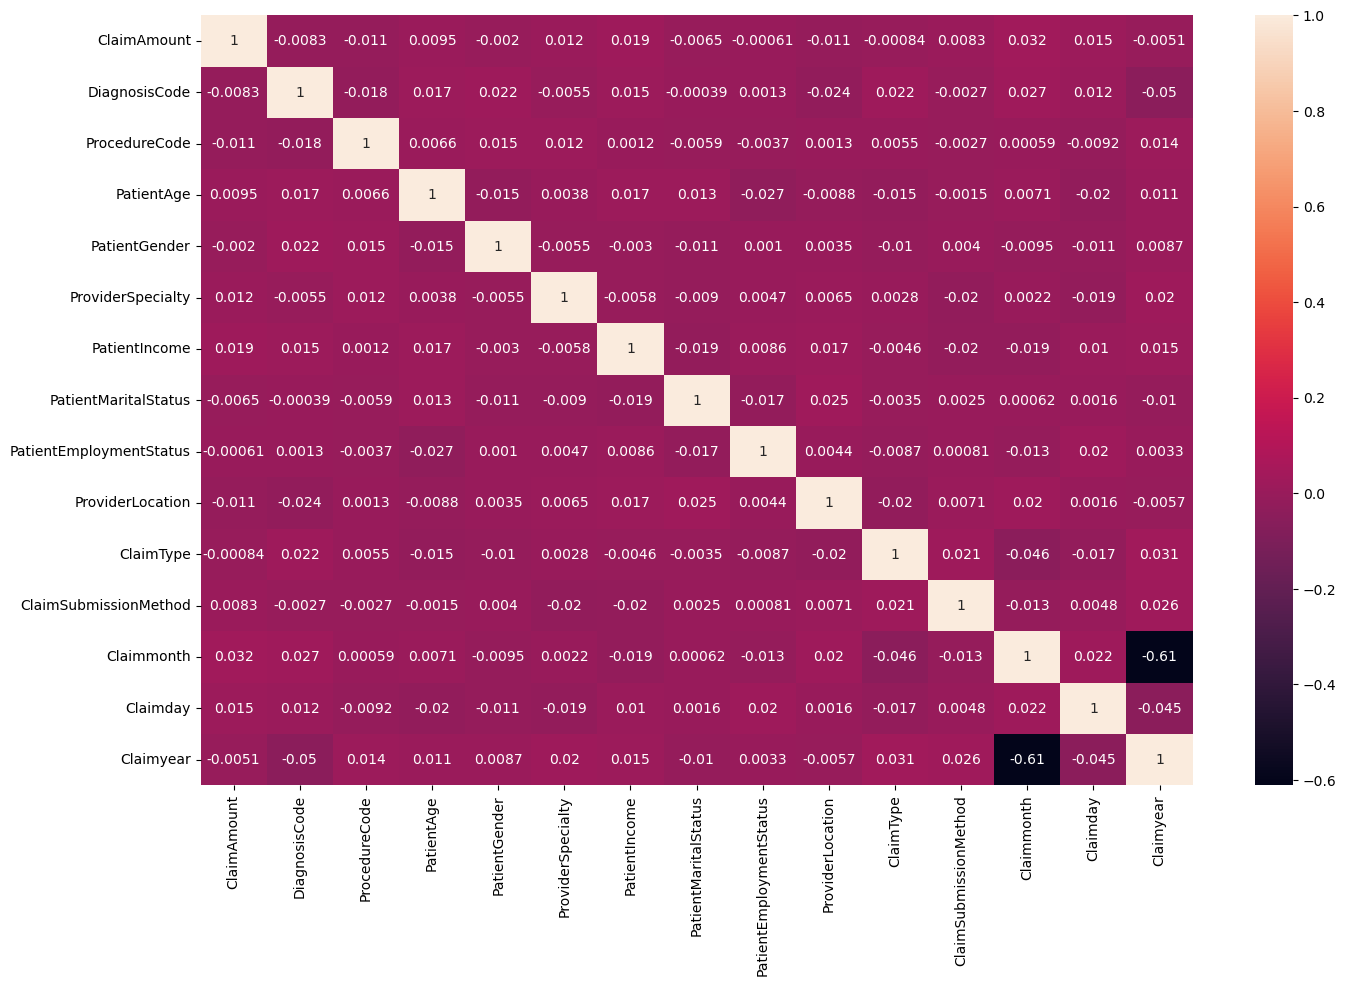

In [13]:
num_cols = df.select_dtypes(include=['int32','int64', 'float64']).columns
plt.figure(figsize=(16,10))
sns.heatmap(df[num_cols].corr(), annot = True)

In [14]:
X = df[num_cols]
y = df['ClaimStatus']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3600, 15) (900, 15) (3600,) (900,)


In [16]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
importances = clf.feature_importances_


importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                    Feature  Importance
2             ProcedureCode    0.105520
1             DiagnosisCode    0.105251
0               ClaimAmount    0.104326
9          ProviderLocation    0.104043
6             PatientIncome    0.103574
3                PatientAge    0.094876
13                 Claimday    0.084286
12               Claimmonth    0.063287
5         ProviderSpecialty    0.045267
7      PatientMaritalStatus    0.038641
10                ClaimType    0.038465
8   PatientEmploymentStatus    0.037966
11    ClaimSubmissionMethod    0.028847
14                Claimyear    0.026825
4             PatientGender    0.018825


In [17]:
from sklearn.metrics import accuracy_score, classification_report
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", classification_rep)

Accuracy:  0.31444444444444447
Classification report: 
               precision    recall  f1-score   support

    Approved       0.34      0.34      0.34       318
      Denied       0.29      0.35      0.32       282
     Pending       0.31      0.26      0.28       300

    accuracy                           0.31       900
   macro avg       0.31      0.31      0.31       900
weighted avg       0.32      0.31      0.31       900



In [18]:
importance_df = importance_df.head(5)

In [19]:
importance_df = importance_df.head(5)
X_train, X_test, y_train, y_test = train_test_split(X[importance_df.iloc[:, 0]], df['ClaimStatus'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3600, 5) (900, 5) (3600,) (900,)


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", classification_rep)

Accuracy:  0.3411111111111111
Classification report: 
               precision    recall  f1-score   support

    Approved       0.36      0.35      0.35       318
      Denied       0.32      0.35      0.33       282
     Pending       0.34      0.33      0.34       300

    accuracy                           0.34       900
   macro avg       0.34      0.34      0.34       900
weighted avg       0.34      0.34      0.34       900



In [22]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train_scaled, y_train)

y_pred = svc_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", classification_rep)

Accuracy:  0.2866666666666667
Classification report: 
               precision    recall  f1-score   support

    Approved       0.33      0.33      0.33       318
      Denied       0.28      0.38      0.32       282
     Pending       0.24      0.15      0.19       300

    accuracy                           0.29       900
   macro avg       0.28      0.29      0.28       900
weighted avg       0.28      0.29      0.28       900



In [23]:
from sklearn.tree import DecisionTreeClassifier
dc_classifier = DecisionTreeClassifier()
dc_classifier.fit(X_train_scaled, y_train)

y_pred = dc_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", classification_rep)

Accuracy:  0.31444444444444447
Classification report: 
               precision    recall  f1-score   support

    Approved       0.33      0.31      0.32       318
      Denied       0.31      0.33      0.32       282
     Pending       0.31      0.30      0.30       300

    accuracy                           0.31       900
   macro avg       0.31      0.31      0.31       900
weighted avg       0.31      0.31      0.31       900



# Unsupervised Learning

In [24]:
df['Month_sin'] = np.sin(2 * np.pi * df['Claimmonth'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Claimmonth'] / 12)

df['Day_sin'] = np.sin(2 * np.pi * df['Claimday'] / 31)
df['Day_cos'] = np.cos(2 * np.pi * df['Claimday'] / 31)

df['Year_sin'] = np.sin(2 * np.pi * df['Claimyear'] / 3)
df['Year_cos'] = np.cos(2 * np.pi * df['Claimyear'] / 3)

df.drop(columns=['ClaimID', 'PatientID', 'ProviderID','ClaimDate','Claimmonth', 'Claimday', 'Claimyear'], inplace=True)

In [25]:
num_cols = df.select_dtypes(include=['int32', 'float64']).columns
print(df.columns)
print(num_cols)

Index(['ClaimAmount', 'DiagnosisCode', 'ProcedureCode', 'PatientAge',
       'PatientGender', 'ProviderSpecialty', 'ClaimStatus', 'PatientIncome',
       'PatientMaritalStatus', 'PatientEmploymentStatus', 'ProviderLocation',
       'ClaimType', 'ClaimSubmissionMethod', 'Month_sin', 'Month_cos',
       'Day_sin', 'Day_cos', 'Year_sin', 'Year_cos'],
      dtype='object')
Index(['ClaimAmount', 'DiagnosisCode', 'ProcedureCode', 'PatientGender',
       'ProviderSpecialty', 'PatientIncome', 'PatientMaritalStatus',
       'PatientEmploymentStatus', 'ProviderLocation', 'ClaimType',
       'ClaimSubmissionMethod', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos',
       'Year_sin', 'Year_cos'],
      dtype='object')


In [26]:
cycled_cols = ['Month_sin', 'Month_cos', 'Day_sin', 'Day_cos','Year_sin', 'Year_cos']
num_cols = df.select_dtypes(include=['int32', 'float64']).columns.difference(cycled_cols)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[num_cols])
df1 = pd.DataFrame(data_scaled, columns = num_cols, index = df.index)
df[num_cols] = df1

In [27]:
df['ClaimStatus'].replace({'Approved' : 0, 'Pending' : 1,'Denied' : 2}, inplace=True)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)
PCA_data = pd.DataFrame(pca.transform(df), columns=(["PC1", "PC2", "PC3"]))
PCA_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,4500.0,-2.911646e-15,28.790521,-49.166001,-25.160876,-0.661805,24.840695,49.842575
PC2,4500.0,1.342136e-17,1.025340,-2.843209,-0.720467,-0.012333,0.707038,3.275835
PC3,4500.0,-6.947529e-17,1.023222,-3.091458,-0.725485,0.003897,0.718718,3.234419


In [29]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3
agg_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_model.fit(PCA_data)
agg_labels = agg_model.labels_
PCA_data['Clusters'] = agg_labels
df['Clusters'] = agg_labels
print("Agglomerative Clustering Labels:")
print(agg_labels)

Agglomerative Clustering Labels:
[0 0 0 ... 0 2 0]


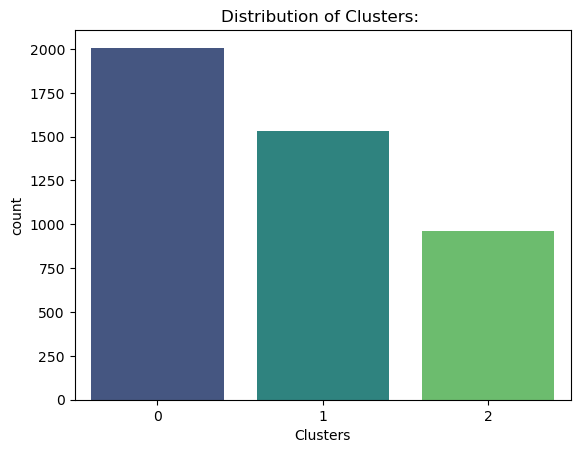

In [30]:
sns.countplot(x=df['Clusters'], palette='viridis')
plt.title("Distribution of Clusters: ")
plt.show()

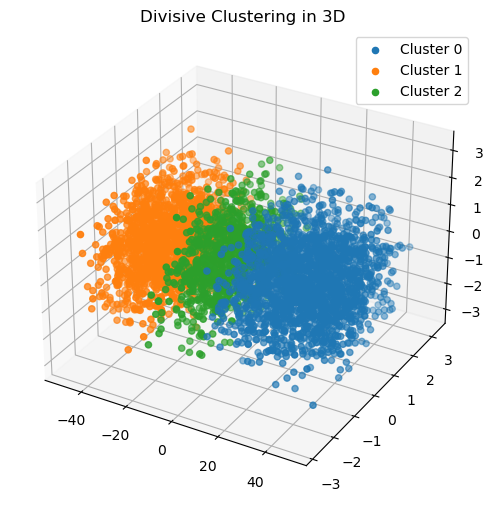

In [31]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111, projection='3d')

# Extracting principal components
x = PCA_data['PC1']
y = PCA_data['PC2']
z = PCA_data['PC3']

# Plotting each cluster separately
for cluster_label in np.unique(agg_labels):
    cluster_indices = agg_labels == cluster_label
    ax.scatter(x[cluster_indices], y[cluster_indices], z[cluster_indices], label=f'Cluster {cluster_label}')

ax.set_title('Divisive Clustering in 3D')
ax.legend()
plt.show()

Text(0.5, 1.0, 'Clusters based on Total amount Spent and Income')

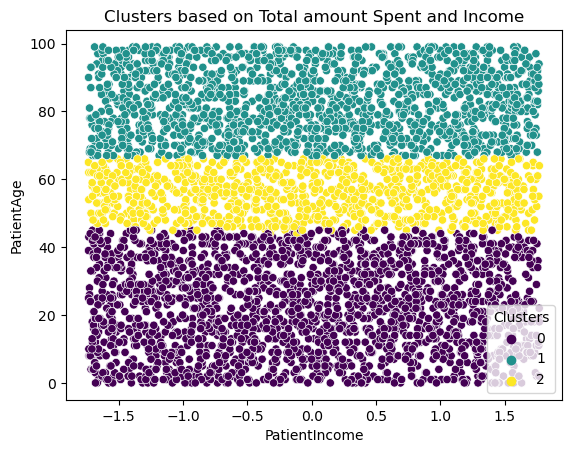

In [32]:
sns.scatterplot(x=df['PatientIncome'], y =df['PatientAge'], hue=df['Clusters'], palette='viridis')
plt.title("Clusters based on Total amount Spent and Income")

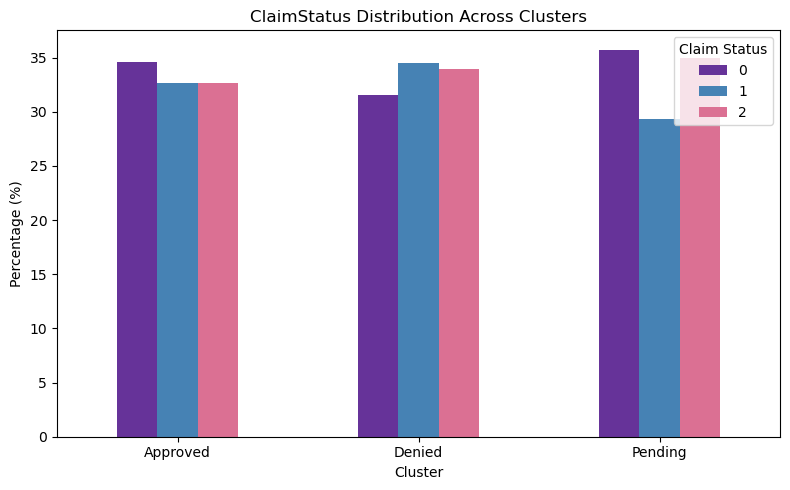

In [40]:
# Compare cluster distribution vs actual claim status
crosstab = pd.crosstab(df['Clusters'], df['ClaimStatus'], normalize='index') * 100
ax = crosstab.plot(kind='bar', figsize=(8, 5), color = ['rebeccapurple', 'steelblue', 'palevioletred'])
ax.set_xticklabels(['Approved', 'Denied', 'Pending'], rotation=0)
plt.title("ClaimStatus Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Percentage (%)")
plt.legend(title="Claim Status")
plt.tight_layout()
plt.show()